In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
#신고일자
df['신고일자'] = pd.to_datetime(df['신고일자'])
df.insert(1, '신고일자_월', df['신고일자'].dt.month)
df.drop('신고일자', axis=1)

,신고번호,신고일자_월,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,...,과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부,핵심적발
0,57298928,1,121,2O5A2,82ZHWNL,NaN,TQ18AK,D,B,15,...,5.397966e+03,10,2106003,8481900000,US,US,A,8.0,1,1
1,85092852,1,30,305K5,5IS70LE,NaN,NaN,C,B,11,...,5.730972e+05,40,4077010,2106909099,US,US,A,8.0,0,0
2,63014158,1,20,CGMT6,GJ5KBL3,R9ZQOG7,NaN,D,B,11,...,5.219489e+04,40,4077007,6307909000,US,US,A,10.0,0,0
3,40175917,1,40,QWUTG,PBYW02T,NaN,NaN,C,B,94,...,1.773608e+06,40,4077106,6505009090,CN,CN,A,8.0,0,0
4,11602631,1,30,0X1CO,MCX0GJB,4Z9PX0Y,NaN,C,B,11,...,8.777327e+06,40,2006075,6204320000,CN,CN,FCN1,5.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89350,78046993,11,10,M9SYU,K8195QD,NaN,PR5UFJ,C,B,11,...,9.139535e+04,10,4002001,703101000,CN,CN,W2,135.0,0,0
89351,85641293,11,41,T7VQN,MSE4EAG,NaN,NaN,E,E,15,...,3.752803e+04,40,4077008,6804220000,CN,CN,FCN1,0.0,0,0
89352,15760215,11,40,7Q31W,5BC6UCR,QW3LA8B,NaN,C,B,29,...,1.381431e+04,10,2086001,8210005000,CN,CN,A,8.0,0,0
89353,20569033,11,40,UJ0JR,U7KJPA6,TJW57CJ,O04TIW,F,B,15,...,4.030176e+03,40,1618003,3304999000,CA,CA,C,6.5,1,2


## Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

df['신고인부호'] = df['신고인부호'].fillna(0)

le = LabelEncoder()
label = df['신고인부호']
le.fit(label)
label_encoded = le.transform(label)

l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['신고인부호'] = l_e_df

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = df['관세율구분코드']
le.fit(label)
label_encoded = le.transform(label)

l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['관세율구분코드'] = l_e_df

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = df['원산지국가코드']
le.fit(label)
label_encoded = le.transform(label)

l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['원산지국가코드'] = l_e_df

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = df['수입통관계획코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['수입통관계획코드'] = l_e_df

In [9]:
label = df['수입신고구분코드']
le.fit(label)
label_encoded = le.transform(label)

l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['수입신고구분코드'] = l_e_df

In [10]:
le = LabelEncoder()
label = df['적출국가코드']
le.fit(label)
label_encoded = le.transform(label)

l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['적출국가코드'] = l_e_df

In [11]:
le = LabelEncoder()
label = df['관세율구분코드']
le.fit(label)
label_encoded = le.transform(label)

l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['관세율구분코드'] = l_e_df

In [13]:
# 수입자부호, 해외거래처부호, 특송업체부호 삭제

df = df.drop(['해외거래처부호', '특송업체부호'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89355 entries, 0 to 89354
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   신고번호      89355 non-null  int64         
 1   신고일자_월    89355 non-null  int64         
 2   신고일자      89355 non-null  datetime64[ns]
 3   통관지세관부호   89355 non-null  int64         
 4   신고인부호     89355 non-null  int32         
 5   수입자부호     89355 non-null  object        
 6   수입통관계획코드  89355 non-null  int32         
 7   수입신고구분코드  89355 non-null  int32         
 8   수입거래구분코드  89355 non-null  int64         
 9   수입종류코드    89355 non-null  int64         
 10  징수형태코드    89355 non-null  int64         
 11  신고중량(KG)  89355 non-null  float64       
 12  과세가격원화금액  89355 non-null  float64       
 13  운송수단유형코드  89355 non-null  int64         
 14  반입보세구역부호  89355 non-null  int64         
 15  HS10단위부호  89355 non-null  int64         
 16  적출국가코드    89355 non-null  int32         
 17  원산지국가코드   89

In [15]:
df

,신고번호,신고일자_월,신고일자,통관지세관부호,신고인부호,수입자부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,...,과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부,핵심적발
0,57298928,1,2020-01-01,121,65,82ZHWNL,2,1,15,23,...,5.397966e+03,10,2106003,8481900000,84,87,0,8.0,1,1
1,85092852,1,2020-01-01,30,75,5IS70LE,1,1,11,21,...,5.730972e+05,40,4077010,2106909099,84,87,0,8.0,0,0
2,63014158,1,2020-01-01,20,319,GJ5KBL3,2,1,11,21,...,5.219489e+04,40,4077007,6307909000,84,87,0,10.0,0,0
3,40175917,1,2020-01-01,40,722,PBYW02T,1,1,94,21,...,1.773608e+06,40,4077106,6505009090,14,16,0,8.0,0,0
4,11602631,1,2020-01-01,30,25,MCX0GJB,1,1,11,21,...,8.777327e+06,40,2006075,6204320000,14,16,11,5.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89350,78046993,11,2020-11-22,10,610,K8195QD,1,1,11,21,...,9.139535e+04,10,4002001,703101000,14,16,34,135.0,0,0
89351,85641293,11,2020-11-22,41,774,MSE4EAG,3,3,15,11,...,3.752803e+04,40,4077008,6804220000,14,16,11,0.0,0,0
89352,15760215,11,2020-11-22,40,207,5BC6UCR,1,1,29,21,...,1.381431e+04,10,2086001,8210005000,14,16,0,8.0,0,0
89353,20569033,11,2020-11-22,40,804,U7KJPA6,4,1,15,21,...,4.030176e+03,40,1618003,3304999000,11,13,1,6.5,1,2


# 결정트리 학습

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [17]:
c=['신고일자_월','통관지세관부호','수입통관계획코드', '수입신고구분코드', '적출국가코드','원산지국가코드','관세율구분코드',
                                      '수입거래구분코드','수입종류코드','징수형태코드','신고중량(KG)','과세가격원화금액',
                                      '운송수단유형코드','반입보세구역부호','HS10단위부호','관세율']
X = np.array(pd.DataFrame(df, columns=c))

In [18]:
Y_1 = np.array(pd.DataFrame(df, columns=['우범여부']))
Y_2 = np.array(pd.DataFrame(df, columns=['핵심적발']))

In [19]:
#데이터 분할
X_train, X_test, y1_train, y1_test = train_test_split(X, Y_1,test_size=0.6)
#데이터 학습
dt_clf_1 = DecisionTreeClassifier(max_depth=150, random_state=10)
dt_clf_1 = dt_clf_1.fit(X_train, y1_train)
pd.set_option('display.max_seq_items', None)
y1_test

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [20]:
dt_prediction_1 = dt_clf_1.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score

print("정밀도:", precision_score(y1_test, dt_prediction_1))
print("재현율:", recall_score(y1_test, dt_prediction_1))
f1 = f1_score(y1_test, dt_prediction_1)
print("F1 스코어: {0:.4f}".format(f1))

정밀도: 0.3546017902226303
재현율: 0.37796623990866834
F1 스코어: 0.3659


feature importances:
[0.058 0.063 0.037 0.016 0.035 0.041 0.034 0.06  0.019 0.046 0.174 0.126
 0.026 0.121 0.106 0.036]
신고일자_월 : 0.058
통관지세관부호 : 0.063
수입통관계획코드 : 0.037
수입신고구분코드 : 0.016
적출국가코드 : 0.035
원산지국가코드 : 0.041
관세율구분코드 : 0.034
수입거래구분코드 : 0.060
수입종류코드 : 0.019
징수형태코드 : 0.046
신고중량(KG) : 0.174
과세가격원화금액 : 0.126
운송수단유형코드 : 0.026
반입보세구역부호 : 0.121
HS10단위부호 : 0.106
관세율 : 0.036


<AxesSubplot:>

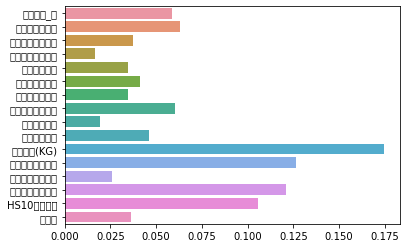

In [22]:
import seaborn as sns
%matplotlib inline

print("feature importances:\n{0}".format(np.round(dt_clf_1.feature_importances_,3)))

for name, value in zip(c, dt_clf_1.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x=dt_clf_1.feature_importances_, y=c)

# test.csv

In [37]:
#test.csv불러와서 train처럼 똑같이 데이터 전처리 하는 과정

t_df = pd.read_csv('test.csv')

t_df['신고일자'] = pd.to_datetime(t_df['신고일자'])
t_df.insert(1, '신고일자_월', t_df['신고일자'].dt.month)
t_df.drop('신고일자', axis=1)

,신고번호,신고일자_월,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,...,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율
0,87601405,11,30,QPV57,ANDWSFE,NVELOBJ,NaN,D,B,11,...,0,2323.1,1.231594e+05,40,2010025,9209999000,TH,TH,FAS1,0.0
1,49428483,11,20,9AYQ5,0FWTLQC,93SPF0B,NaN,C,B,11,...,11,867.2,6.001085e+04,10,4077010,8703239020,AE,KR,C,8.0
2,67484911,11,40,5CBJ1,RNVXTRN,BON3KQF,NaN,C,B,11,...,11,1700.8,4.945234e+04,40,2010724,3926200000,DK,CN,C,6.5
3,42803508,11,20,1HUE4,PWUIU5M,DIH9NVE,9BO2S9,F,B,15,...,14,1628.0,1.230726e+04,10,4077003,2106909099,US,US,A,8.0
4,34214927,11,40,QPV57,ET2AJPR,F7P1I30,NaN,C,B,11,...,0,1961.5,4.262224e+05,40,1602003,8480710000,CN,CN,FCN1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10520,33357888,12,40,QPV57,2OWH6M7,I0MG4ZH,NaN,D,B,11,...,11,420.8,4.690141e+03,40,4002001,4202921090,CN,CN,A,8.0
10521,14455915,12,13,F57Z2,35JHADJ,40P9B1W,QJ0YGH,F,B,89,...,33,19979.0,3.955338e+06,40,4077106,9001300000,DE,DE,C,8.0
10522,83923494,12,40,4TYA6,OEYQJDQ,NaN,NaN,D,B,11,...,11,3793.2,2.673082e+06,10,3078022,8525801020,VN,VN,CIT,0.0
10523,17890784,12,30,CGMT6,V69LHEI,NaN,PR5UFJ,C,B,11,...,11,5148.8,1.147732e+05,10,2006089,2106909099,US,US,A,8.0


### label encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
t_le = LabelEncoder()
t_label = t_df['수입통관계획코드']
t_le.fit(t_label)
t_label_encoded = t_le.transform(t_label)

t_l_e_df = pd.DataFrame(t_label_encoded, columns=['label_encoded'])
t_df['수입통관계획코드'] = t_l_e_df

In [39]:
t_label = t_df['수입신고구분코드']
t_le.fit(t_label)
t_label_encoded = t_le.transform(t_label)

t_l_e_df = pd.DataFrame(t_label_encoded, columns=['t_label_encoded'])
t_df['수입신고구분코드'] = t_l_e_df

In [40]:
t_label = t_df['관세율구분코드']
t_le.fit(t_label)
t_label_encoded = t_le.transform(t_label)

t_l_e_df = pd.DataFrame(t_label_encoded, columns=['t_label_encoded'])
t_df['관세율구분코드'] = t_l_e_df

In [41]:
t_label = t_df['원산지국가코드']
t_le.fit(t_label)
t_label_encoded = t_le.transform(t_label)

t_l_e_df = pd.DataFrame(t_label_encoded, columns=['t_label_encoded'])
t_df['원산지국가코드'] = t_l_e_df

In [42]:
t_label = t_df['적출국가코드']
t_le.fit(t_label)
t_label_encoded = t_le.transform(t_label)

t_l_e_df = pd.DataFrame(t_label_encoded, columns=['t_label_encoded'])
t_df['적출국가코드'] = t_l_e_df

In [43]:
t_df = t_df.drop(['해외거래처부호', '특송업체부호'], axis=1)
t_df

,신고번호,신고일자_월,신고일자,통관지세관부호,신고인부호,수입자부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율
0,87601405,11,2020-11-23,30,QPV57,ANDWSFE,2,1,11,21,0,2323.1,1.231594e+05,40,2010025,9209999000,67,66,6,0.0
1,49428483,11,2020-11-23,20,9AYQ5,0FWTLQC,1,1,11,21,11,867.2,6.001085e+04,10,4077010,8703239020,0,38,1,8.0
2,67484911,11,2020-11-23,40,5CBJ1,RNVXTRN,1,1,11,11,11,1700.8,4.945234e+04,40,2010724,3926200000,17,14,1,6.5
3,42803508,11,2020-11-23,20,1HUE4,PWUIU5M,4,1,15,21,14,1628.0,1.230726e+04,10,4077003,2106909099,71,71,0,8.0
4,34214927,11,2020-11-23,40,QPV57,ET2AJPR,1,1,11,21,0,1961.5,4.262224e+05,40,1602003,8480710000,13,14,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10520,33357888,12,2020-12-31,40,QPV57,2OWH6M7,2,1,11,21,11,420.8,4.690141e+03,40,4002001,4202921090,13,14,0,8.0
10521,14455915,12,2020-12-31,13,F57Z2,35JHADJ,4,1,89,21,33,19979.0,3.955338e+06,40,4077106,9001300000,16,16,1,8.0
10522,83923494,12,2020-12-31,40,4TYA6,OEYQJDQ,2,1,11,21,11,3793.2,2.673082e+06,10,3078022,8525801020,73,73,2,0.0
10523,17890784,12,2020-12-31,30,CGMT6,V69LHEI,1,1,11,21,11,5148.8,1.147732e+05,10,2006089,2106909099,71,71,0,8.0


In [44]:
#t_df를 array로 해서 X1으로 지정
X1 = np.array(pd.DataFrame(t_df, columns=c))

In [45]:
#데이터 평가 _ 학습때 했던 dt_prediction_1에다가 test.csv값인 X1 넣고 돌리기
t_dt_prediction_1 = dt_clf_1.predict(X1)
t_dt_prediction_1

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
test_df=pd.DataFrame()
test_df['신고번호']=t_df['신고번호']
test_df['우범여부']=t_dt_prediction_1
test_df

,신고번호,우범여부
0,87601405,1
1,49428483,0
2,67484911,1
3,42803508,1
4,34214927,0
...,...,...
10520,33357888,0
10521,14455915,0
10522,83923494,0
10523,17890784,0


In [47]:
test_df=pd.DataFrame()
test_df['신고번호']=t_df['신고번호']
test_df['핵심적발']=t_dt_prediction_1
test_df

,신고번호,핵심적발
0,87601405,1
1,49428483,0
2,67484911,1
3,42803508,1
4,34214927,0
...,...,...
10520,33357888,0
10521,14455915,0
10522,83923494,0
10523,17890784,0


In [48]:
test_df['핵심적발'].unique()

array([1, 0], dtype=int64)